In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
tabelaBelo = pd.read_csv('dadosBeloJardim.csv',delimiter=',',encoding='ISO-8859-1')
display(tabelaBelo)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001496890,2019,1,F,1,3,1,2,0,2,...,A,A,A,B,B,A,D,A,B,B
1,190001486200,2019,3,M,1,3,1,2,0,2,...,B,A,A,B,A,B,C,A,A,A
2,190001497060,2019,6,M,1,2,1,2,0,2,...,A,A,B,B,A,A,B,A,A,B
3,190001500717,2019,4,F,1,3,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B
4,190001508075,2019,2,F,1,2,1,2,0,2,...,B,A,A,B,B,A,A,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,210056479680,2022,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
1393,210055342011,2022,2,M,1,1,1,2,0,2,...,B,A,A,B,A,A,C,A,A,B
1394,210055508100,2022,4,M,1,1,1,2,0,2,...,A,A,A,E,B,A,E,A,B,B
1395,210056449922,2022,3,M,1,2,1,2,0,2,...,B,A,A,B,A,A,B,A,A,B


In [3]:
#CRIANDO REGRA PARA SABER PERFIL DE ESTUDANTE DO ENSINO MEDIO
# Supondo que seus dados estejam armazenados em um DataFrame chamado df
tabelaBelo[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']] = tabelaBelo[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].fillna(0)

tabelaBelo['NU_NOTA_TOTAL'] = tabelaBelo[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)
#QUESTAO SOBRE ALUNOS QUE TEM ACESSO
tabelaBelo['Q025'] = tabelaBelo['Q025'].replace({'A': 0, 'B': 1})
display(tabelaBelo['Q025'])
#QUANTOS ESTUDANTES TEM ACESSO A INTERNET
tabelaBelo['Q024'] = tabelaBelo['Q024'].replace({'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 1})
display(tabelaBelo['Q024'])
cont = tabelaBelo['Q024'].value_counts()
#Ate que serie estudou seu pai
tabelaBelo['Q001'] = tabelaBelo['Q001'].replace({'A': 0, 'B': 0,'C': 0, 'D': 0,'E': 1, 'F': 1, 'G': 1,'H': 1})
#Ate que serie sua mae estudou
tabelaBelo['Q002'] = tabelaBelo['Q002'].replace({'A': 0, 'B': 0,'C': 0, 'D': 0,'E': 1, 'F': 1, 'G': 1,'H': 1})
#Qual grupo familiar seu pai pertence
tabelaBelo['Q003'] = tabelaBelo['Q003'].replace({'A': 0, 'B': 0,'C': 0, 'D': 1,'E': 1, 'F': 1})
#Qual grupo familiar sua mae pertence
tabelaBelo['Q004'] = tabelaBelo['Q004'].replace({'A': 0, 'B': 0,'C': 0, 'D': 1,'E': 1, 'F': 1})
#renda da familia
tabelaBelo['Q006'] = tabelaBelo['Q006'].replace({'A': 0, 'B': 0,'C': 0, 'D': 0,'E': 1, 'F': 1, 'G': 1, 'H' : 1,'I': 1,'J':1, 'K':1, 'L':1,'M': 1,'N': 1, 'O':1,'P': 1,'Q': 1})
#possue celular
tabelaBelo['Q022'] = tabelaBelo['Q022'].replace({'A': 0, 'B': 1,'C': 1, 'D': 1,'E': 1})
#print(cont)
#tabelaBelo['DESEMPENHO_SATISFATORIO'] = tabelaBelo.apply(lambda x: 'sim' if(x['NU_NOTA_TOTAL'] >= 500) else 'nao')
#tabelaBelo['DESEMPENHO_SATISFATORIO'] = tabelaBelo.apply(lambda x: 'sim' if(x['NU_NOTA_TOTAL'] >= 500) and (x['Q025'] == 1) and (x['Q024'] == 1) else 'nao', axis=1)
print("Tabela medias :")
print(tabelaBelo['NU_NOTA_TOTAL'])
#REGRA PARA O PROBABILIDADE DE ESTUDANTE SE SAIR BEM NO ENEM CONSIDERANDO NOTAS
'''tabelaBelo['DESEMPENHO_SATISFATORIO'] = tabelaBelo.apply(lambda x: 'ótimo' if(x['NU_NOTA_TOTAL'] >= 650) and (x['NU_NOTA_REDACAO'] >= 800) else
                                                         'bom' if(x['NU_NOTA_TOTAL'] >= 500) and (x['NU_NOTA_REDACAO'] >= 600) else
                                                         'regular' if (x['NU_NOTA_TOTAL'] >= 300) and (x['NU_NOTA_REDACAO'] >= 500)
                                                          else 'insuficiente', axis=1)'''
'''tabelaBelo['DESEMPENHO_SATISFATORIO'] = tabelaBelo.apply(lambda x: 'Satisfatório(condição social alta)'
                                                         if(x['NU_NOTA_TOTAL'] >= 500) and (x['NU_NOTA_REDACAO'] > 0) 
                                                         and (x['Q001'] == 1) and (x['Q002'] == 1) and (x['Q003'] == 1)
                                                         and (x['Q004'] == 1) and (x['Q006'] == 1) and (x['TP_ESCOLA'] == 3)
                                                         and (x['Q022'] == 1) and (x['Q024'] == 1) and (x['Q025'] == 1) else
                                                         'Satisfatório(condição social baixa)' if(x['NU_NOTA_TOTAL'] >= 500) and (x['NU_NOTA_REDACAO'] > 0) 
                                                         and (x['Q001'] == 0) and (x['Q002'] == 0) and (x['Q003'] == 0)
                                                         and (x['Q004'] == 0) and (x['Q006'] == 0) and (x['TP_ESCOLA'] == 2)
                                                         and (x['Q022'] == 0) and (x['Q024'] == 0) and (x['Q025'] == 0) else
                                                         'Desempenho insatifatório' if(x['NU_NOTA_TOTAL'] < 500)
                                                         else 'Desempenho satisfatório(condição social média)',axis=1)'''
tabelaBelo['DESEMPENHO_SATISFATORIO'] = tabelaBelo.apply(lambda x: 'Satisfatório(condição social alta)'
                                                         if(x['NU_NOTA_TOTAL'] >= 500) and (x['NU_NOTA_REDACAO'] > 0) 
                                                         and (x['Q001'] == 1) and (x['Q002'] == 1) and (x['Q003'] == 1)
                                                         and (x['Q004'] == 1) and (x['Q006'] == 1) and (x['TP_ESCOLA'] == 3)
                                                         and (x['Q022'] == 1) and (x['Q024'] == 1) and (x['Q025'] == 1) else
                                                         'Satisfatório(condição social baixa)' if(x['NU_NOTA_TOTAL'] >= 500) and (x['NU_NOTA_REDACAO'] > 0) 
                                                         and (x['Q001'] == 0) and (x['Q002'] == 0) and (x['Q003'] == 0)
                                                         and (x['Q004'] == 0) and (x['Q006'] == 0) and (x['TP_ESCOLA'] == 2)
                                                         and (x['Q022'] == 0) and (x['Q024'] == 0) and (x['Q025'] == 0) else
                                                         'Insatisfatorio(condição social alta)' if (x['NU_NOTA_TOTAL'] < 500) and (x['NU_NOTA_REDACAO'] > 0) 
                                                         and (x['Q001'] == 1) and (x['Q002'] == 1) and (x['Q003'] == 1)
                                                         and (x['Q004'] == 1) and (x['Q006'] == 1) and (x['TP_ESCOLA'] == 3)
                                                         and (x['Q022'] == 1) and (x['Q024'] == 1) and (x['Q025'] == 1) else
                                                         'Insatisfatório(condição social baixa)' if(x['NU_NOTA_TOTAL'] < 500) and (x['NU_NOTA_REDACAO'] > 0) 
                                                         and (x['Q001'] == 0) and (x['Q002'] == 0) and (x['Q003'] == 0)
                                                         and (x['Q004'] == 0) and (x['Q006'] == 0) and (x['TP_ESCOLA'] == 2)
                                                         and (x['Q022'] == 0) and (x['Q024'] == 0) and (x['Q025'] == 0) else
                                                         'Desempenho satisfatório(condição social média)' if(x['NU_NOTA_TOTAL'] >= 500) and (x['NU_NOTA_REDACAO'] > 0) 
                                                         and (x['Q001'] == 1) or (x['Q002'] == 1) or (x['Q003'] == 1)
                                                         and (x['Q004'] == 0) or (x['Q006'] == 1) or (x['TP_ESCOLA'] == 3)
                                                         and (x['Q022'] == 0) or (x['Q024'] == 1) or (x['Q025'] == 1) else
                                                         'Desempenho insatisfatório(condição social média)' if(x['NU_NOTA_TOTAL'] < 500) and (x['NU_NOTA_REDACAO'] > 0) 
                                                         and (x['Q001'] == 1) or (x['Q002'] == 1) or (x['Q003'] == 1)
                                                         and (x['Q004'] == 0) or (x['Q006'] == 1) or (x['TP_ESCOLA'] == 3)
                                                         and (x['Q022'] == 0) or (x['Q024'] == 1) or (x['Q025'] == 1)
                                                         else 'Outro perfil',axis=1)

0       1
1       0
2       1
3       1
4       1
       ..
1392    1
1393    1
1394    1
1395    1
1396    1
Name: Q025, Length: 1397, dtype: int64

0       1
1       0
2       0
3       0
4       1
       ..
1392    0
1393    0
1394    1
1395    0
1396    0
Name: Q024, Length: 1397, dtype: int64

Tabela medias :
0       593.78
1       463.24
2       529.30
3       498.14
4       510.10
         ...  
1392    584.14
1393    564.86
1394    499.86
1395      0.00
1396    566.68
Name: NU_NOTA_TOTAL, Length: 1397, dtype: float64


In [4]:

#FAZENDO QUANTIDADE DE ESTUDANTES QUE IRÃO SE SAIR PARA BUSCAR UMA FACULDADE
cont_desenpenho = tabelaBelo['DESEMPENHO_SATISFATORIO'].value_counts()
print("Quantidade desenpenho: ",cont_desenpenho)

print(tabelaBelo['DESEMPENHO_SATISFATORIO'])        
arquivo_concatenado = 'dadosTeste1.csv'
tabelaBelo.to_csv(arquivo_concatenado, index=False)
display(tabelaBelo)
train_data, test_data = train_test_split(tabelaBelo, test_size=0.3, random_state=42)

X_train = train_data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO','TP_ESCOLA','Q001','Q002','Q003','Q004','Q006','Q022','Q024','Q025']]
y_train = train_data['DESEMPENHO_SATISFATORIO']

X_test = test_data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO','TP_ESCOLA','Q001','Q002','Q003','Q004','Q006','Q022','Q024','Q025']]
y_test = test_data['DESEMPENHO_SATISFATORIO']

# Criando um objeto de árvore de decisão
dtree = DecisionTreeClassifier()

# Ajustando a árvore de decisão aos dados de treinamento
dtree.fit(X_train, y_train)

# Fazendo previsões com a árvore de decisão nos dados de teste
y_pred = dtree.predict(X_test)

Quantidade desenpenho:  Desempenho satisfatório(condição social média)      1212
Outro perfil                                         128
Satisfatório(condição social alta)                    37
Insatisfatorio(condição social alta)                   8
Desempenho insatisfatório(condição social média)       7
Insatisfatório(condição social baixa)                  3
Satisfatório(condição social baixa)                    2
Name: DESEMPENHO_SATISFATORIO, dtype: int64
0       Desempenho satisfatório(condição social média)
1       Desempenho satisfatório(condição social média)
2       Desempenho satisfatório(condição social média)
3       Desempenho satisfatório(condição social média)
4       Desempenho satisfatório(condição social média)
                             ...                      
1392    Desempenho satisfatório(condição social média)
1393    Desempenho satisfatório(condição social média)
1394    Desempenho satisfatório(condição social média)
1395    Desempenho satisfatório(condiç

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL,DESEMPENHO_SATISFATORIO
0,190001496890,2019,1,F,1,3,1,2,0,2,...,A,B,B,A,1,A,1,1,593.78,Desempenho satisfatório(condição social média)
1,190001486200,2019,3,M,1,3,1,2,0,2,...,A,B,A,B,1,A,0,0,463.24,Desempenho satisfatório(condição social média)
2,190001497060,2019,6,M,1,2,1,2,0,2,...,B,B,A,A,1,A,0,1,529.30,Desempenho satisfatório(condição social média)
3,190001500717,2019,4,F,1,3,1,2,0,2,...,A,B,A,A,1,A,0,1,498.14,Desempenho satisfatório(condição social média)
4,190001508075,2019,2,F,1,2,1,2,0,2,...,A,B,B,A,0,A,1,1,510.10,Desempenho satisfatório(condição social média)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,210056479680,2022,3,F,1,3,1,2,0,2,...,A,B,A,A,1,A,0,1,584.14,Desempenho satisfatório(condição social média)
1393,210055342011,2022,2,M,1,1,1,2,0,2,...,A,B,A,A,1,A,0,1,564.86,Desempenho satisfatório(condição social média)
1394,210055508100,2022,4,M,1,1,1,2,0,2,...,A,E,B,A,1,A,1,1,499.86,Desempenho satisfatório(condição social média)
1395,210056449922,2022,3,M,1,2,1,2,0,2,...,A,B,A,A,1,A,0,1,0.00,Desempenho satisfatório(condição social média)


Matriz de confusão [[  3   0   0   0   0   0   0]
 [  2 355   1   0   0   5   0]
 [  0   1   1   0   0   0   0]
 [  0   0   0   1   0   0   0]
 [  0   4   0   0  36   0   0]
 [  0   2   1   0   0   7   0]
 [  0   0   0   0   0   0   1]]
Acurácia:  0.9619047619047619
Precisão: 0.9673349118652986
Recall: 0.9619047619047619


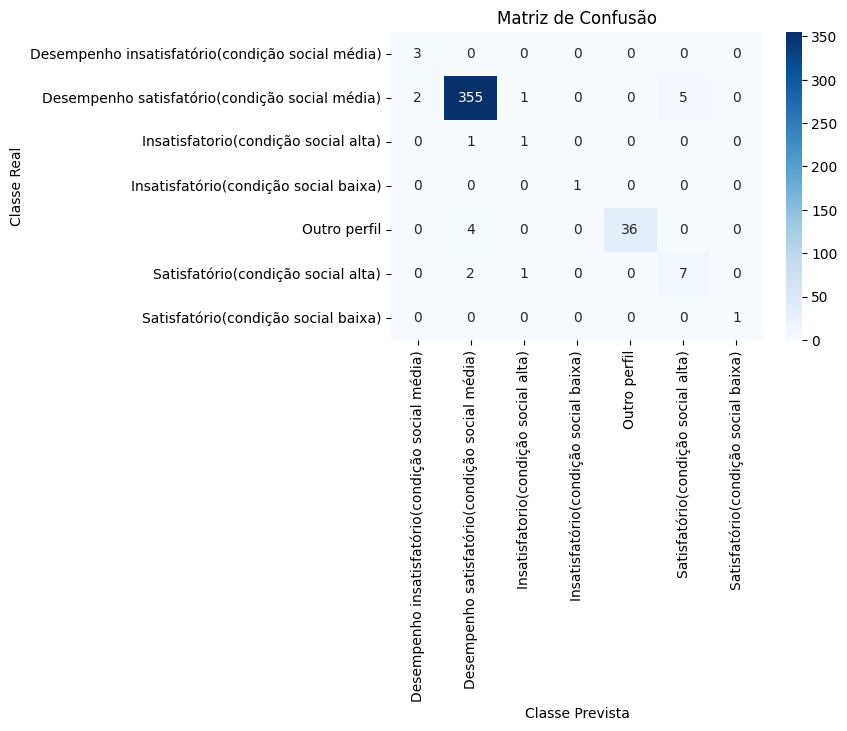

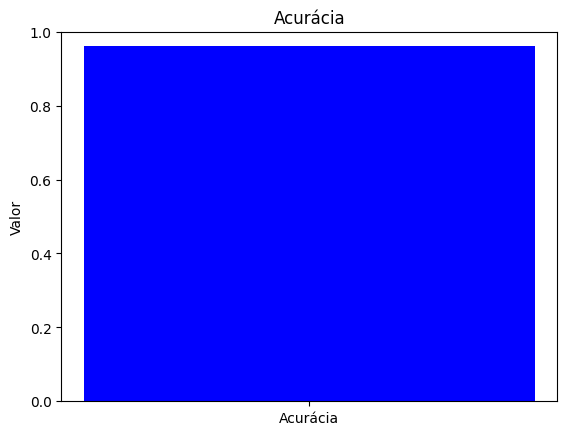

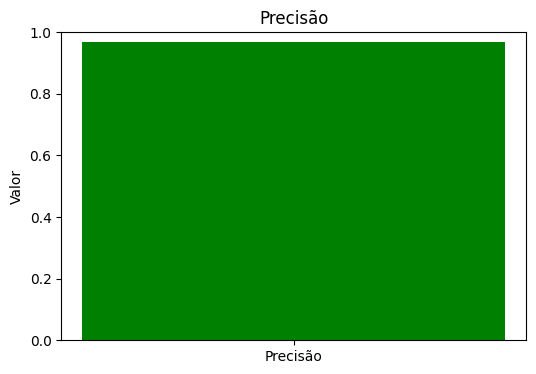

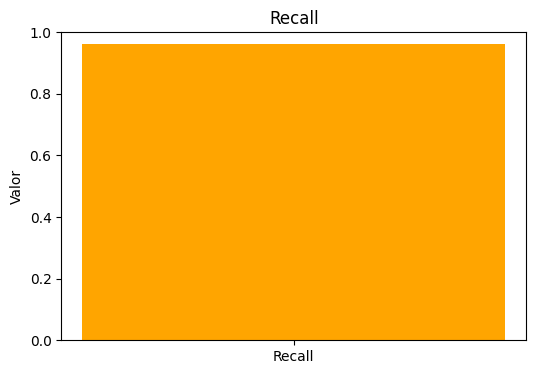

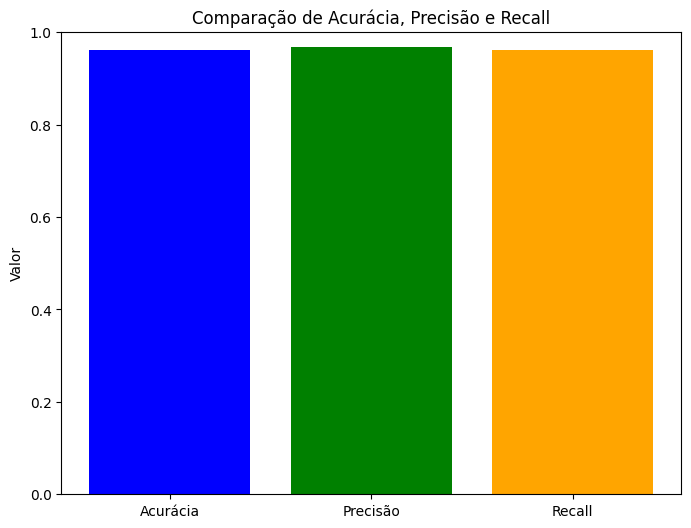

In [21]:
#MOSTRANDO RESULTADO DE ALGORITMO
# Avaliando a precisão da árvore de decisão
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Matriz de confusão",confusion_matrix(y_test, y_pred))
print("Acurácia: ",accuracy_score(y_test, y_pred))
print("Precisão:", precision)
print("Recall:", recall)

# Avaliando a precisão do modelo
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Plot da matriz de confusão usando seaborn
labels = np.unique(y_test)
# Ajuste o tamanho da figura conforme necessário
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.savefig('matriz_confusao.png')
plt.show()

# Plot da acurácia : É a proporção de previsões corretas em relação ao total de previsões.
plt.bar(['Acurácia'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.title('Acurácia')
plt.ylabel('Valor')
plt.show()

# Plot da precisão : É a proporção de instâncias previstas como positivas que realmente são positivas. É uma métrica importante quando o custo de falsos positivos é alto.
plt.figure(figsize=(6, 4))
plt.bar(['Precisão'], [precision], color='green')
plt.ylim(0, 1)
plt.title('Precisão')
plt.ylabel('Valor')
plt.show()

# Plot do recall: É a proporção de instâncias positivas que foram corretamente previstas como positivas. É uma métrica importante quando o custo de falsos negativos é alto
plt.figure(figsize=(6, 4))
plt.bar(['Recall'], [recall], color='orange')
plt.ylim(0, 1)
plt.title('Recall')
plt.ylabel('Valor')
plt.show()
# Criar as categorias
categories = ['Acurácia', 'Precisão', 'Recall']

# Valores correspondentes
values = [accuracy, precision, recall]

# Cores para cada barra
colors = ['blue', 'green', 'orange']

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=colors)
plt.ylim(0, 1)  # Defina o limite y de 0 a 1 para manter a consistência entre as métricas

# Adicionar rótulos e título
plt.ylabel('Valor')
plt.title('Comparação de Acurácia, Precisão e Recall')

# Mostrar o gráfico
plt.show()

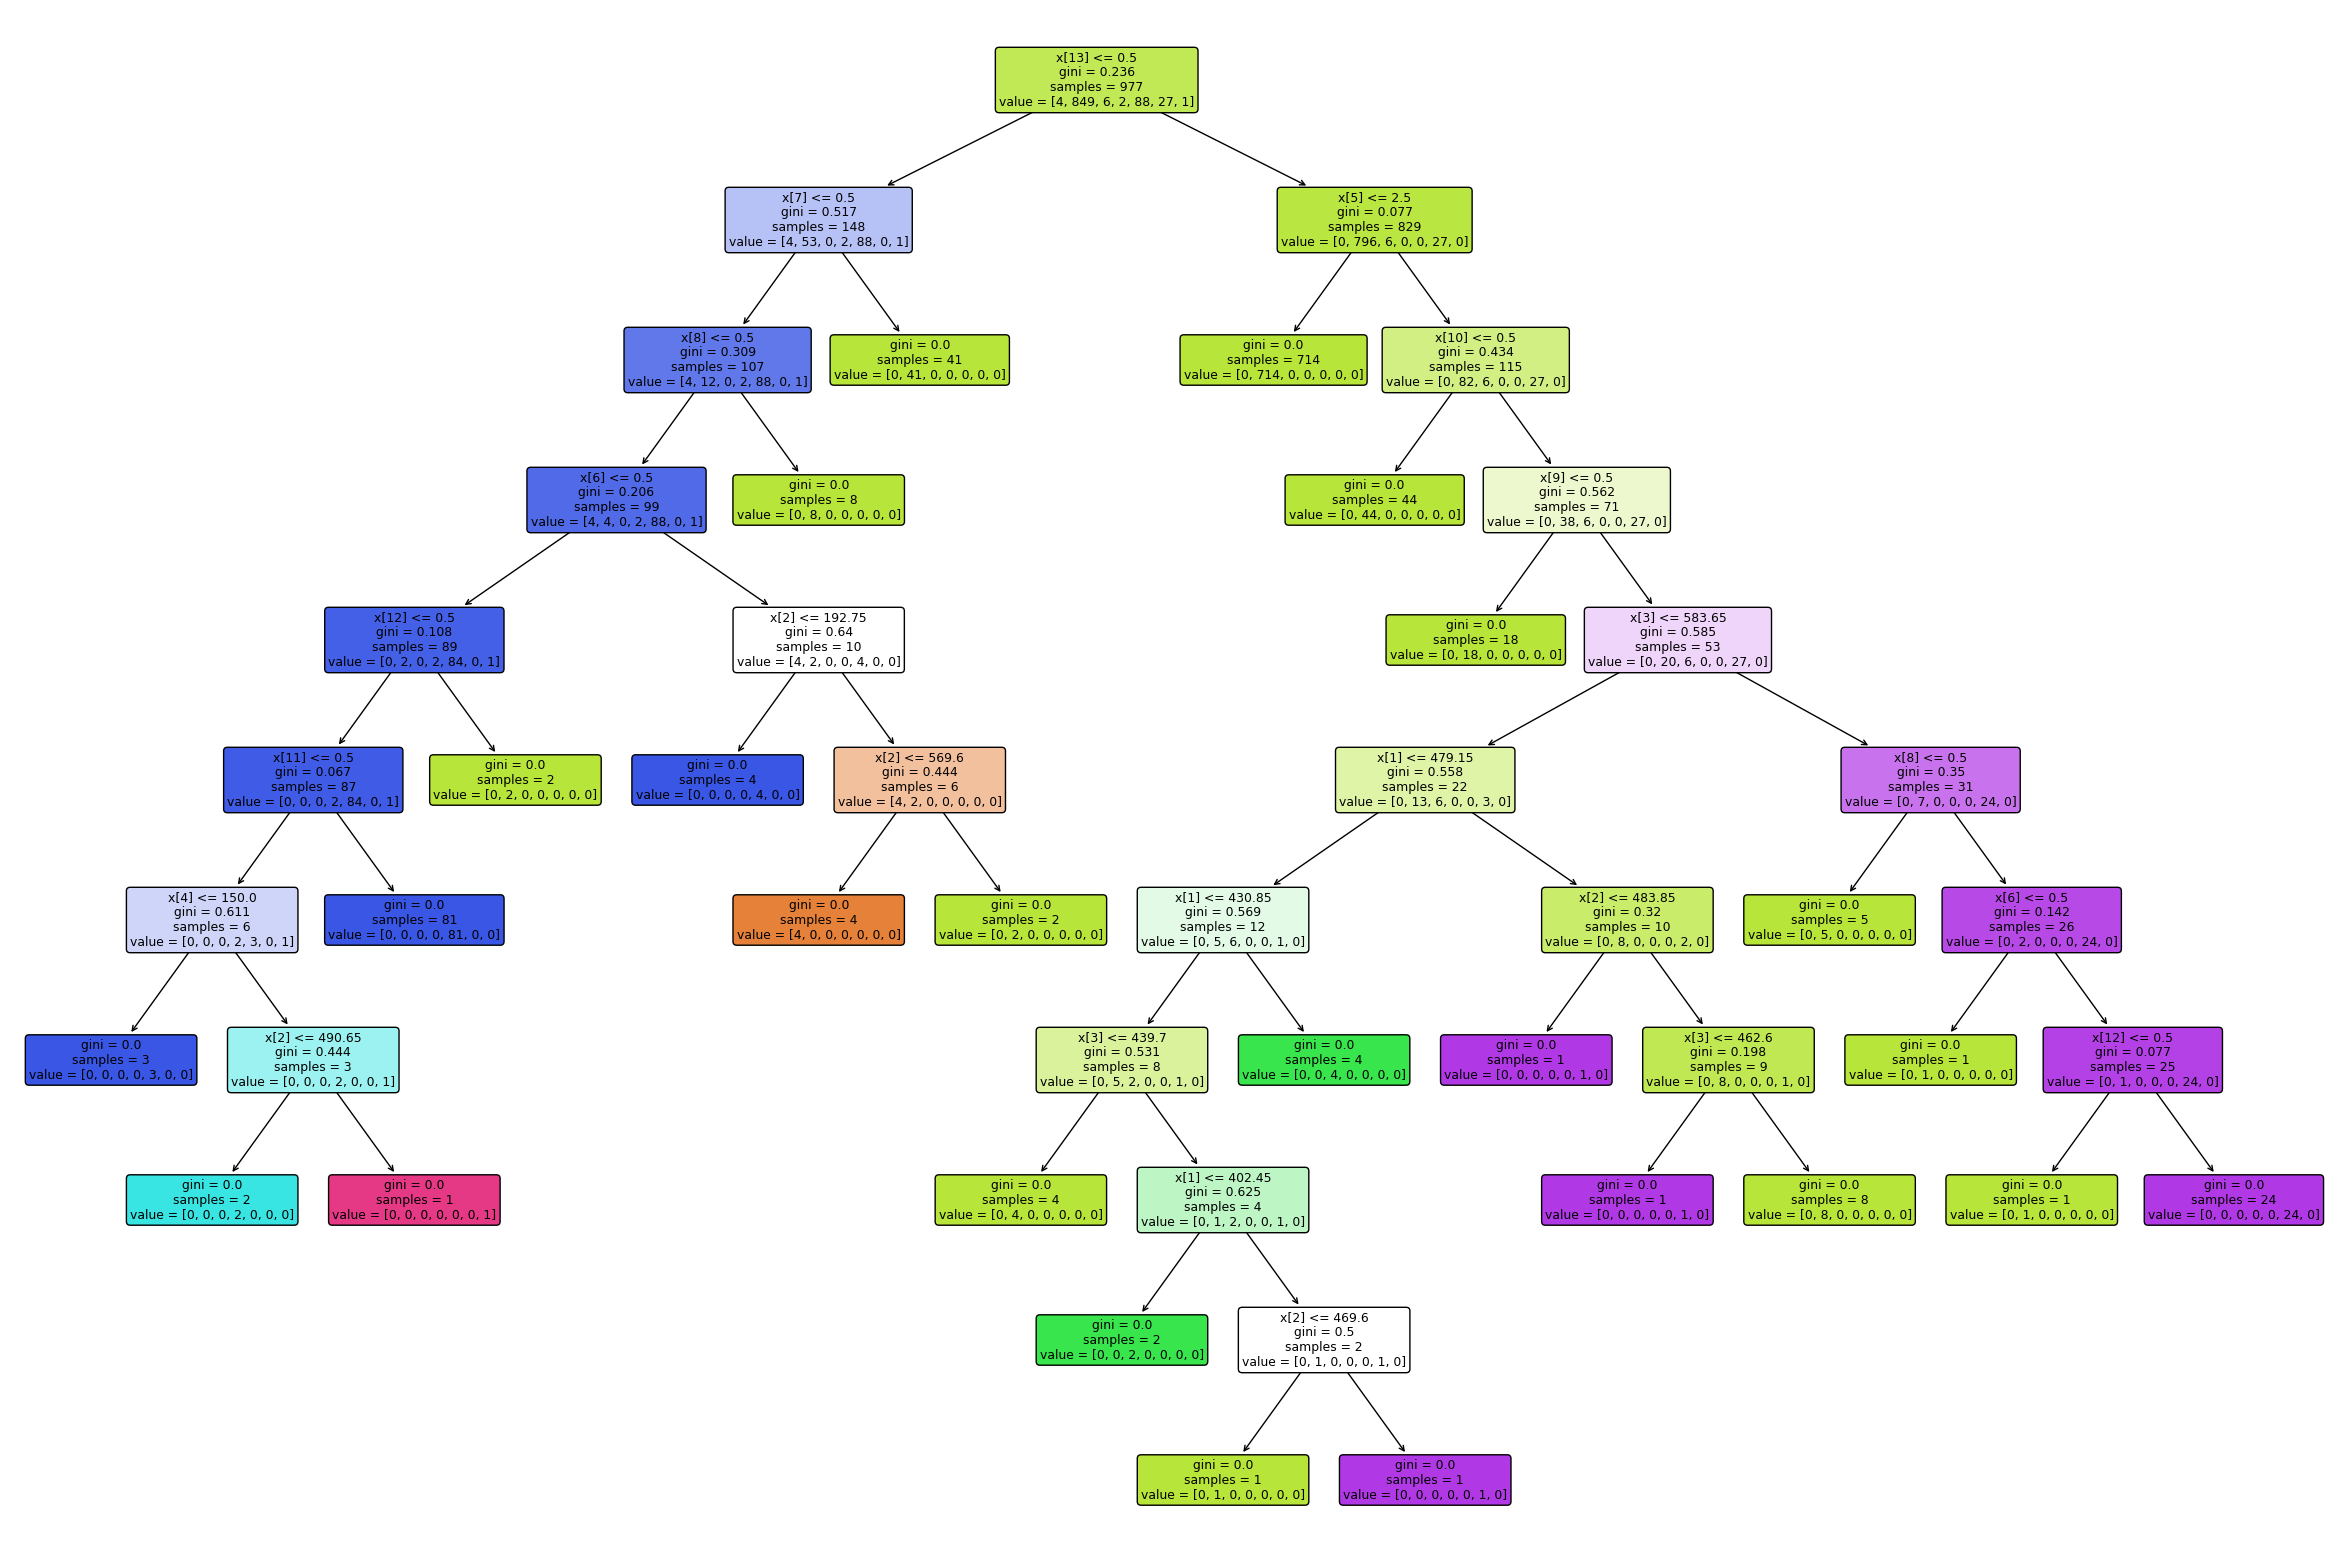

In [14]:

plt.figure(figsize=(30,20))
plot_tree(dtree, filled=True, rounded=True)

caminho_arquivo_png = r'C:\Users\felip\Documents\tcc - usando machile learning para educação\DadosMesclados\arvore_decisao1.png'
# Salvar a imagem em formato PNG
plt.savefig(caminho_arquivo_png)
plt.show()

In [7]:
# criando um novo conjunto de dados para um aluno fictício
novo_aluno = pd.DataFrame({
    'NU_NOTA_CN': [550],
    'NU_NOTA_CH': [580],
    'NU_NOTA_LC': [650],
    'NU_NOTA_MT': [650],
    'NU_NOTA_REDACAO': [650],
    'TP_ESCOLA': [3],
    'Q001' :[1],
    'Q002' :[1],
    'Q003' :[1],
    'Q004' :[1],
    'Q006' :[1],
    'Q022' :[1],
    'Q024' :[1],
    'Q025' :[1]
    
})

# usando a árvore de decisão para prever se o desempenho do aluno é satisfatório ou não
predicao = dtree.predict(novo_aluno)

# exibindo a previsão
print(predicao)

['Satisfatório(condição social alta)']


In [14]:
novo_aluno = pd.DataFrame({
    'NU_NOTA_CN': [550],
    'NU_NOTA_CH': [530],
    'NU_NOTA_LC': [550],
    'NU_NOTA_MT': [550],
    'NU_NOTA_REDACAO': [550],
    'TP_ESCOLA': [2],
    'Q001' :[0],
    'Q002' :[0],
    'Q003' :[0],
    'Q004' :[0],
    'Q006' :[0],
    'Q022' :[0],
    'Q024' :[0],
    'Q025' :[0]
    
})

# usando a árvore de decisão para prever se o desempenho do aluno é satisfatório ou não
predicao = dtree.predict(novo_aluno)

# exibindo a previsão
print(predicao)

['Insatisfatório(condição social baixa)']


In [8]:
novo_aluno = pd.DataFrame({
    'NU_NOTA_CN': [500],
    'NU_NOTA_CH': [450],
    'NU_NOTA_LC': [400],
    'NU_NOTA_MT': [450],
    'NU_NOTA_REDACAO': [550],
    'TP_ESCOLA': [2],
    'Q001' :[1],
    'Q002' :[0],
    'Q003' :[0],
    'Q004' :[1],
    'Q006' :[0],
    'Q022' :[1],
    'Q024' :[0],
    'Q025' :[0]
    
})

# usando a árvore de decisão para prever se o desempenho do aluno é satisfatório ou não
predicao = dtree.predict(novo_aluno)

# exibindo a previsão
print(predicao)

['Desempenho insatisfatório(condição social média)']


In [9]:
novo_aluno = pd.DataFrame({
    'NU_NOTA_CN': [500],
    'NU_NOTA_CH': [450],
    'NU_NOTA_LC': [400],
    'NU_NOTA_MT': [450],
    'NU_NOTA_REDACAO': [550],
    'TP_ESCOLA': [2],
    'Q001' :[0],
    'Q002' :[0],
    'Q003' :[0],
    'Q004' :[0],
    'Q006' :[0],
    'Q022' :[0],
    'Q024' :[0],
    'Q025' :[0]
    
})

# usando a árvore de decisão para prever se o desempenho do aluno é satisfatório ou não
predicao = dtree.predict(novo_aluno)

# exibindo a previsão
print(predicao)

['Insatisfatório(condição social baixa)']


In [10]:
novo_aluno = pd.DataFrame({
    'NU_NOTA_CN': [300],
    'NU_NOTA_CH': [450],
    'NU_NOTA_LC': [400],
    'NU_NOTA_MT': [450],
    'NU_NOTA_REDACAO': [450],
    'TP_ESCOLA': [3],
    'Q001' :[1],
    'Q002' :[1],
    'Q003' :[1],
    'Q004' :[1],
    'Q006' :[1],
    'Q022' :[1],
    'Q024' :[1],
    'Q025' :[1]
    
})

# usando a árvore de decisão para prever se o desempenho do aluno é satisfatório ou não
predicao = dtree.predict(novo_aluno)

# exibindo a previsão
print(predicao)

['Insatisfatorio(condição social alta)']


In [9]:
#TESTE

import numpy as np
tabelaTeste = pd.read_csv('dadosBeloJardim.csv',delimiter=',',encoding='ISO-8859-1')
num = 210052156280
# supondo que você tenha um DataFrame chamado "dados_aluno" com os dados de um aluno específico
aluno = tabelaTeste.loc[tabelaTeste['NU_INSCRICAO'] == num]
print(aluno)
# Criando um array numpy com as notas do aluno e sua resposta para a questão de acesso à internet (Q1)
# Criando um array numpy com as notas do aluno e sua resposta para a questão de acesso à internet (Q1)

entrada = np.array([aluno['NU_NOTA_CN'], aluno['NU_NOTA_CH'], aluno['NU_NOTA_LC'], aluno['NU_NOTA_MT'],aluno['NU_NOTA_REDACAO']])
entrada = entrada.reshape(1, -1)
previsao = dtree.predict(entrada)

print(f"A previsão do aluno no desempenho é de {previsao} satisfatório")

     NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
878  210052156280    2021                3       F                1   

     TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
878            3                 1                2                0   

     TP_ESCOLA  ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
878          2  ...     A     A     A    A     A    A     B     A     A     B  

[1 rows x 76 columns]


C:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but DecisionTreeClassifier is expecting 14 features as input.

In [12]:
resultados = []
cont = 0
contFor = 0
contN = 0
tabelaTeste.fillna(0, inplace=True)
for i in range(len(tabelaTeste)):
    entrada = np.array([tabelaTeste['NU_NOTA_CN'][i], tabelaTeste['NU_NOTA_CH'][i], tabelaTeste['NU_NOTA_LC'][i], tabelaTeste['NU_NOTA_MT'][i], tabelaTeste['NU_NOTA_REDACAO'][i]])
    entrada = entrada.reshape(1, -1)
    previsao = dtree.predict(entrada)
    print(previsao)
    if previsao == ['sim']:
        cont += 1
    else:
        contN += 1
    contFor += 1
print(cont)
print(contFor)
print(contN)
print(resultados)
    

['Desempenho satisfatório(condição social média)']
['Desempenho satisfatório(condição social média)']
['Desempenho insatifatório']
['Desempenho satisfatório(condição social média)']
['Desempenho satisfatório(condição social média)']
['Desempenho satisfatório(condição social média)']
['Satisfatório(condição social baixa)']
['Desempenho satisfatório(condição social média)']
['Desempenho insatifatório']
['Desempenho satisfatório(condição social média)']
['Desempenho satisfatório(condição social média)']
['Desempenho insatifatório']
['Desempenho satisfatório(condição social média)']
['Desempenho insatifatório']
['Desempenho insatifatório']
['Satisfatório(condição social alta)']
['Desempenho insatifatório']
['Desempenho satisfatório(condição social média)']
['Desempenho insatifatório']
['Desempenho satisfatório(condição social média)']
['Desempenho insatifatório']
['Desempenho satisfatório(condição social média)']
['Desempenho satisfatório(condição social média)']
['Desempenho insatifatório

C:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid

In [ ]:
#teste tabela
# Supondo que seus dados estejam armazenados em um DataFrame chamado df
tabelaBelo[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']] = tabelaBelo[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].fillna(0)

tabelaBelo['NU_NOTA_TOTAL'] = tabelaBelo[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)
#QUESTAO SOBRE ALUNOS QUE TEM ACESSO
tabelaBelo['Q025'] = tabelaBelo['Q025'].replace({'A': 0, 'B': 1})
display(tabelaBelo['Q025'])
#QUANTOS ESTUDANTES TEM ACESSO A INTERNET
tabelaBelo['Q024'] = tabelaBelo['Q024'].replace({'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 1})
display(tabelaBelo['Q024'])
cont = tabelaBelo['Q024'].value_counts()
#Ate que serie estudou seu pai
tabelaBelo['Q001'] = tabelaBelo['Q001'].replace({'A': 0, 'B': 0,'C': 0, 'D': 0,'E': 1, 'F': 1, 'G': 1,'H': 1})
#Ate que serie sua mae estudou
tabelaBelo['Q002'] = tabelaBelo['Q002'].replace({'A': 0, 'B': 0,'C': 0, 'D': 0,'E': 1, 'F': 1, 'G': 1,'H': 1})
#Qual grupo familiar seu pai pertence
tabelaBelo['Q003'] = tabelaBelo['Q003'].replace({'A': 0, 'B': 0,'C': 0, 'D': 1,'E': 1, 'F': 1})
#Qual grupo familiar sua mae pertence
tabelaBelo['Q004'] = tabelaBelo['Q004'].replace({'A': 0, 'B': 0,'C': 0, 'D': 1,'E': 1, 'F': 1})
#renda da familia
tabelaBelo['Q006'] = tabelaBelo['Q006'].replace({'A': 0, 'B': 0,'C': 0, 'D': 0,'E': 1, 'F': 1, 'G': 1, 'H' : 1,'I': 1,'J':1, 'K':1, 'L':1,'M': 1,'N': 1, 'O':1,'P': 1,'Q': 1})
#possue celular
tabelaBelo['Q022'] = tabelaBelo['Q022'].replace({'A': 0, 'B': 1,'C': 1, 'D': 1,'E': 1})
#print(cont)
#tabelaBelo['DESEMPENHO_SATISFATORIO'] = tabelaBelo.apply(lambda x: 'sim' if(x['NU_NOTA_TOTAL'] >= 500) else 'nao')
#tabelaBelo['DESEMPENHO_SATISFATORIO'] = tabelaBelo.apply(lambda x: 'sim' if(x['NU_NOTA_TOTAL'] >= 500) and (x['Q025'] == 1) and (x['Q024'] == 1) else 'nao', axis=1)
print("Tabela medias :")
print(tabelaBelo['NU_NOTA_TOTAL'])
#REGRA PARA O PROBABILIDADE DE ESTUDANTE SE SAIR BEM NO ENEM CONSIDERANDO NOTAS
'''tabelaBelo['DESEMPENHO_SATISFATORIO'] = tabelaBelo.apply(lambda x: 'ótimo' if(x['NU_NOTA_TOTAL'] >= 650) and (x['NU_NOTA_REDACAO'] >= 800) else
                                                         'bom' if(x['NU_NOTA_TOTAL'] >= 500) and (x['NU_NOTA_REDACAO'] >= 600) else
                                                         'regular' if (x['NU_NOTA_TOTAL'] >= 300) and (x['NU_NOTA_REDACAO'] >= 500)
                                                          else 'insuficiente', axis=1)'''
tabelaBelo['DESEMPENHO_SATISFATORIO'] = tabelaBelo.apply(lambda x: 'Satisfatório(condição social alta)'
                                                         if(x['NU_NOTA_TOTAL'] >= 500) and (x['NU_NOTA_REDACAO'] > 0) 
                                                         and (x['Q001'] == 1) and (x['Q002'] == 1) and (x['Q003'] == 1)
                                                         and (x['Q004'] == 1) and (x['Q006'] == 1) and (x['TP_ESCOLA'] == 3)
                                                         and (x['Q022'] == 1) and (x['Q024'] == 1) and (x['Q025'] == 1) else
                                                         'Satisfatório(condição social baixa)' if(x['NU_NOTA_TOTAL'] >= 500) and (x['NU_NOTA_REDACAO'] > 0) 
                                                         and (x['Q001'] == 0) and (x['Q002'] == 0) and (x['Q003'] == 0)
                                                         and (x['Q004'] == 0) and (x['Q006'] == 0) and (x['TP_ESCOLA'] == 2)
                                                         and (x['Q022'] == 0) and (x['Q024'] == 0) and (x['Q025'] == 0) else
                                                         'Desempenho insatifatório' if(x['NU_NOTA_TOTAL'] < 500)
                                                         else 'Desempenho satisfatório(condição social média)',axis=1)


arquivo_concatenado = 'dadosTeste.csv'
tabelaBelo.to_csv(arquivo_concatenado, index=False)